# **Projet : Classification du Diagnostic du Cancer du Sein à l'Aide de Modèles de Machine Learning**

In [ ]:
import pandas as pd  # Importation de la bibliothèque pandas pour la manipulation et l'analyse des données.
import seaborn as sns  
import matplotlib.pyplot as plt  # Importation de la bibliothèque matplotlib pour la création de graphiques et de visualisations.
import numpy as np  # Pour les opérations numériques

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split  # Importation de train_test_split pour diviser les données en ensembles d'entraînement et de test.
from sklearn.preprocessing import StandardScaler  

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC  # Importation du classificateur SVM (Support Vector Machine).

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Importation de métriques pour évaluer les performances des modèles :

import tkinter as tk  # Pour la création de l'interface graphique
from tkinter import messagebox  # Pour afficher des messages d'erreur ou d'information

**1. Collecte et Exploration des Données :**

- Charger le dataset et explorer ses caractéristiques.

In [ ]:
# Charger les données à partir d'un fichier CSV
df = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data.csv")

# Afficher les 5 premières lignes du DataFrame
print(df.head())

# Afficher des informations générales sur le DataFrame
print(df.info())

# Afficher des statistiques descriptives sur les colonnes numériques du DataFrame
print(df.describe())

# Compter les occurrences de chaque valeur dans la colonne 'diagnosis'
print(df['diagnosis'].value_counts())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

 - Visualiser les relations entre les caractéristiques et les classes de tume.

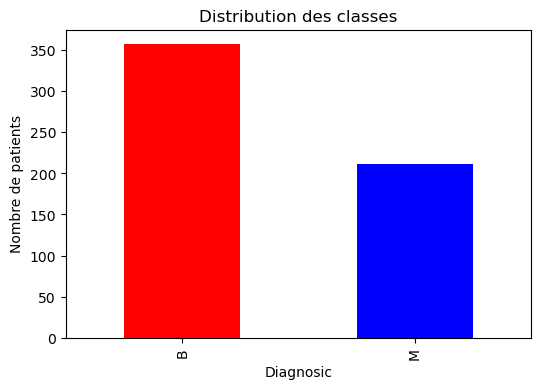

In [ ]:
# Configuration de la taille de la figure
plt.figure(figsize=(6, 4))

# Création d'un graphique en barres pour la variable 'diagnosis' du DataFrame 'df'
df['diagnosis'].value_counts().plot(kind='bar', color=['red', 'blue'])

# Ajout d'un titre au graphique
plt.title('Distribution des classes')

# Étiquetage de l'axe x
plt.xlabel('Diagnosic')

# Étiquetage de l'axe y
plt.ylabel('Nombre de patients')

# Affichage du graphique
plt.show()

**2- Prétraitement des Données :**

- Vérification des valeurs manquantes ou aberrantes

In [ ]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Cette ligne supprime les colonnes 'id' et 'Unnamed: 32' du DataFrame df.
# Ceci est utile pour éliminer les colonnes non pertinentes ou celles qui ne sont pas nécessaires pour l'analyse ou le modèle de machine learning.
df = df.drop(columns=['id','Unnamed: 32'])

# X représente les caractéristiques (features) du modèle.
X = df.values[:, 1:]

# y représente les étiquettes (labels) ou la variable cible du modèle.
y = df.values[:,0]

# LabelEncoder est un outil de la bibliothèque sklearn utilisé pour convertir les étiquettes non numérique en valeurs numériques.
label_encoder = LabelEncoder()

# Cette ligne convertit les étiquettes y en valeurs numériques.
y = label_encoder.fit_transform(y)

# Cette ligne affiche les étiquettes transformées y après leur conversion en valeurs numériques.
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

- Normaliser les données si nécessaire.

In [ ]:
# StandardScaler est un outil qui permet de standardiser les caractéristiques en supprimant la moyenne et en les redimensionnant à l'unité de variance.
scaler = StandardScaler()

X = scaler.fit_transform(X)

**3- Construction des Modèles :**

- Choix de différents algorithmes de classification tels que la regression logistique, les k-plus proches
voisins (KNN), les arbres de décision, ou les machines à vecteurs de support (SVM).

In [ ]:
# Initialisation des modèles

# Ce modèle est utilisé pour la classification binaire. Il prédit la probabilité qu'une instance appartienne à une classe donnée.
logisticRegression = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100)

# KNeighborsClassifier : Ce modèle est utilisé pour la classification en fonction des k voisins les plus proches dans l'espace des caractéristiques.
# n_neighbors=5 : Définit le nombre de voisins à considérer pour la classification. Ici, k=5 signifie que le modèle regarde les 5 voisins les plus proches pour prendre une décision de classification.
knn = KNeighborsClassifier(n_neighbors=5)

# DecisionTreeClassifier : Ce modèle est utilisé pour la classification en divisant l'espace des caractéristiques en sous-espaces plus simples avec des décisions arborescentes.
decisionTree = DecisionTreeClassifier(random_state=42)

# SVC : Ce modèle est utilisé pour la classification en cherchant l'hyperplan qui maximise la marge entre les différentes classes.
svc = SVC(kernel='linear', probability=True)

- Division des données en ensembles d'entraînement et de test.

In [ ]:
# Cette fonction divise les ensembles de caractéristiques (X) et les étiquettes (y) en deux parties :
# 80% des données seront utilisées pour l'entraînement du modèle (train)
# 20% des données seront utilisées pour tester le modèle (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les ensembles de test pour les caractéristiques et les étiquettes
print('X test:', X_test)
print('y test:', y_test)

# Afficher la forme des ensembles d'entraînement et de test
print('\n')
print(X_train.shape)  
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)   

X test: [[-0.47069438 -0.16048584 -0.44810956 ... -0.19956318  0.18320441
   0.19695794]
 [ 1.36687747  0.47014935  1.30288585 ...  0.97897545 -0.56582801
  -1.00057787]
 [ 0.37850807  0.04429607  0.40082046 ...  0.56024403 -0.10314275
  -0.20813168]
 ...
 [-0.74050787 -1.01451947 -0.74550281 ... -0.28209134 -0.3830188
  -0.3245049 ]
 [ 0.02633046  1.99205126  0.02393013 ... -0.49358878 -1.63518099
  -0.33170895]
 [ 1.87526288  2.75300221  1.80128727 ...  0.78102969 -0.05299156
  -0.0978542 ]]
y test: [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


(455, 30)
(114, 30)
(455,)
(114,)


**4- Entraînement des Modèles :**

- Entraînement des modèles sur l'ensemble d'entraînement.

In [ ]:
# Entraîner le modèle de régression logistique en utilisant les données d'entraînement
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [ ]:
# Entraîner le modèle k-NN avec les données d'entraînement
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Entraîner l'arbre de décision sur les données d'entraînement
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Entraîner le modèle SVC (Support Vector Classifier) en utilisant les données d'entraînement X_train et les étiquettes y_train
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

**5- Évaluation des Modèles :**

- Évaluation des performances des modèles sur l'ensemble de test à l'aide de mesures telles que la 
précision, le rappel, le score F1, etc.

- Pour la régression logistique :

In [ ]:
y_pred_lr = logisticRegression.predict(X_test)  # Prédiction des classes
score_lr = logisticRegression.score(X_test, y_test)  # Calcul du score de précision du modèle

conf_m_lr = confusion_matrix(y_test, y_pred_lr)  # Matrice de confusion
report_lr = classification_report(y_test, y_pred_lr)  # Rapport de classification

print('coef:', logisticRegression.coef_)  # Affichage des coefficients des caractéristiques

# Afficher les résultats de la prédiction et de l'évaluation du modèle
print('y_pred:', y_pred_lr) 
print('score_:', score_lr)  
print('report:', report_lr) 

coef: [[ 0.01146017  0.06536587 -0.19451816  0.12579135 -0.03161027 -2.70369672
   1.62585234  3.27132452 -0.85234709  0.98719831  3.44748935 -0.53573182
  -0.08595781  2.32641215  0.73225669 -0.2296724  -1.64840312  1.29371876
  -1.30001437 -1.46491158  1.79845788  2.52988146  0.1420662   1.91801059
   0.063007   -0.16098994  2.57882141  0.65852799  2.57509848  0.03815448]]
y_pred: [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]
score_: 0.9736842105263158
report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



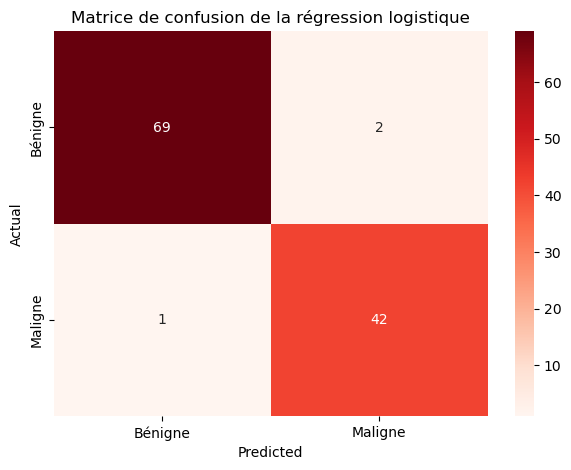

In [ ]:
# Visualiser la matrice de confusion
class_names = ['Bénigne', 'Maligne']  # Définir les noms de classe

plt.figure(figsize=(7, 5))  # Définir la taille de la figure

# Créer un heatmap de la matrice de confusion avec annotations, format d'affichage des nombres, colormap, et labels des axes
sns.heatmap(conf_m_lr, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Matrice de confusion de la régression logistique')  
plt.show() 

- Pour KNN :

In [ ]:
# Prédiction des classes pour les données de test
y_pred_knn = knn.predict(X_test)

# Calcul du score de précision du modèle sur les données de test
score_knn = knn.score(X_test, y_test)

# Calcul de la matrice de confusion
conf_m_knn = confusion_matrix(y_test, y_pred_knn)

# Calcul du rapport de classification (précision, rappel, F1-score, support)
report_knn = classification_report(y_test, y_pred_knn)

# Affichage des données pour analyse et évaluation du modèle
print('y_pred:', y_pred_knn)  
print('score_:', score_knn)  
print('report:', report_knn)

y_pred: [0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
score_: 0.9473684210526315
report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



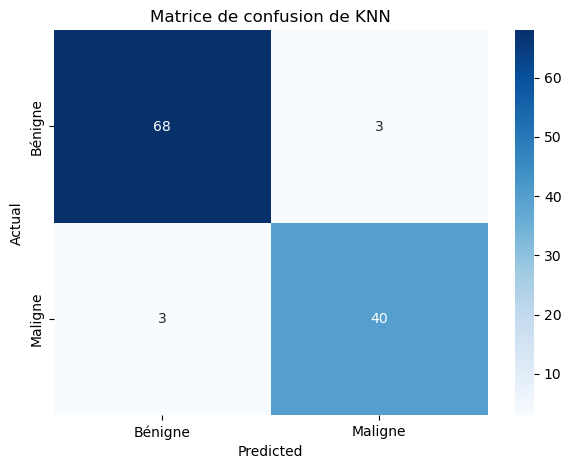

In [ ]:
# Visualiser la matrice de confusion
class_names = ['Bénigne', 'Maligne']  # Définition des noms de classe

# Création d'une figure avec la taille spécifiée
plt.figure(figsize=(7, 5))

# Tracé de la matrice de confusion sous forme de heatmap avec annotations et étiquettes des classes sur les axes x et y
sns.heatmap(conf_m_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Ajout de labels pour les axes x et y ainsi qu'un titre
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de confusion de KNN')

# Affichage de la figure
plt.show()

- Pour l'arbre de décision :

In [ ]:
# Prédiction des classes
y_pred_dt = decisionTree.predict(X_test)

# Calcul du score de précision du modèle sur l'ensemble de test
score_dt = decisionTree.score(X_test, y_test)

# Calcul de la matrice de confusion
conf_m_dt = confusion_matrix(y_test, y_pred_dt)

# Génération d'un rapport de classification détaillé
report_dt = classification_report(y_test, y_pred_dt)

# Affichage des résultats 
print('y_pred:', y_pred_dt) 
print('score_:', score_dt) 
print('report:', report_dt)

y_pred: [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1]
score_: 0.9473684210526315
report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



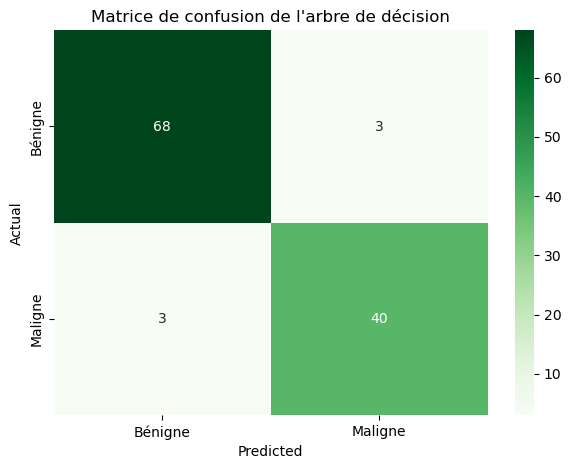

In [ ]:
# Visualiser la matrice de confusion
class_names = ['Bénigne', 'Maligne']  # Définir les noms de classe pour l'axe des x et des y

plt.figure(figsize=(7, 5))  # Définir la taille de la figure
sns.heatmap(conf_m_dt, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)  # Créer un heatmap avec la matrice de confusion
plt.xlabel('Predicted')  # Ajouter un label pour l'axe des x
plt.ylabel('Actual')  # Ajouter un label pour l'axe des y
plt.title('Matrice de confusion de l\'arbre de décision')  # Ajouter un titre à la figure
plt.show()  # Afficher la figure

- Pour SVC :

In [ ]:
# Prédiction des étiquettes sur les données de test
y_pred_svc = svc.predict(X_test)

# Calcul du score de précision du modèle sur les données de test
score_svc = svc.score(X_test, y_test)

# Création de la matrice de confusion
conf_m_svc = confusion_matrix(y_test, y_pred_svc)

# Génération du rapport de classification
report_svc = classification_report(y_test, y_pred_svc)

print('coef:', svc.coef_)  
print('y_pred:', y_pred_svc)  
print('score_:', score_svc)  
print('report:', report_svc)  

coef: [[ 0.34833958  0.04966562  0.27402958  0.22557498 -0.04695998 -0.74839442
   0.67784288  1.41898786 -0.16089556  0.13466801  0.99063644 -0.38279026
   0.18812867  0.78276212  0.33548193 -0.34777974 -0.23099505  0.17602829
  -0.40104241 -0.59120343  0.59612256  1.21662483  0.12880297  0.55136434
   0.21777145 -0.16165344  0.73931741  0.1295932   0.79190023  0.53352716]]
y_pred: [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]
score_: 0.956140350877193
report:               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



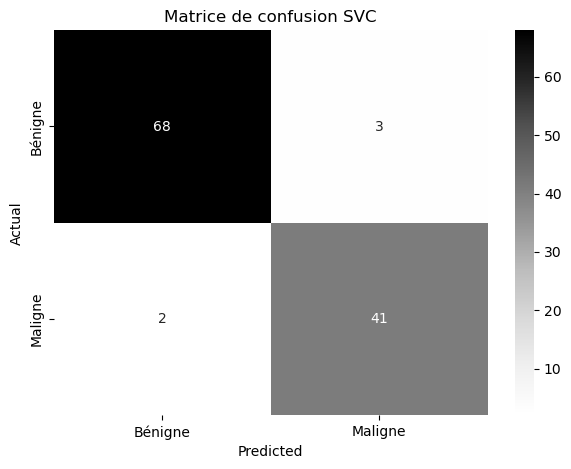

In [ ]:
# Visualiser la matrice de confusion
class_names = ['Bénigne', 'Maligne']

plt.figure(figsize=(7, 5))

# Création de la heatmap avec seaborn
sns.heatmap(conf_m_svc, annot=True, fmt='d', cmap='Grays', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')  
plt.ylabel('Actual')    
plt.title('Matrice de confusion SVC') 
plt.show() 

**6- Interprétation des Résultats :**

 - Analyse des caractéristiques qui influent le plus sur la prédiction du diagnostic du cancer du sein 
selon les modèles développés.
 - Identification des caractéristiques les plus importantes pour la classification des tumeurs.

- Pour Régression logistique :

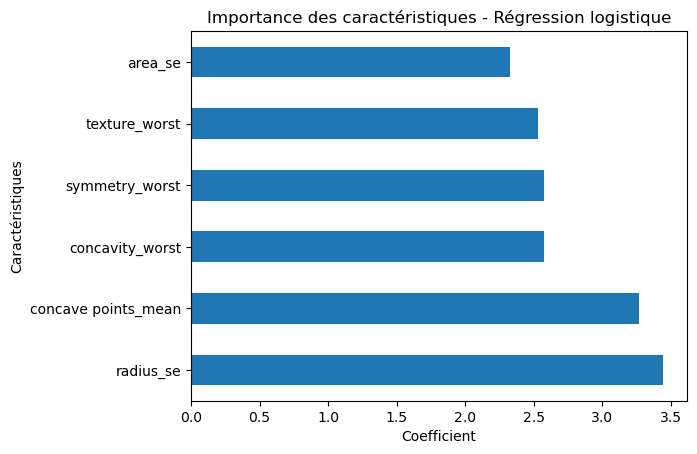

In [ ]:
# Création d'une série pandas avec les coefficients du modèle de régression logistique
# L'index de la série sera les noms des colonnes de DataFrame, en ignorant la première colonne
coeff = pd.Series(logisticRegression.coef_[0], index=df.columns[1:])

# Tri des coefficients par ordre décroissant pour voir les caractéristiques les plus importantes en premier
coeff = coeff.sort_values(ascending=False)

# Création d'un graphique en barres horizontales des 6 caractéristiques les plus importantes
coeff.nlargest(6).plot(kind='barh')

# Ajout du titre et des étiquettes au graphique pour une meilleure compréhension
plt.title('Importance des caractéristiques - Régression logistique')
plt.xlabel('Coefficient')
plt.ylabel('Caractéristiques')

# Affichage du graphique
plt.show()

- Pour KNN :

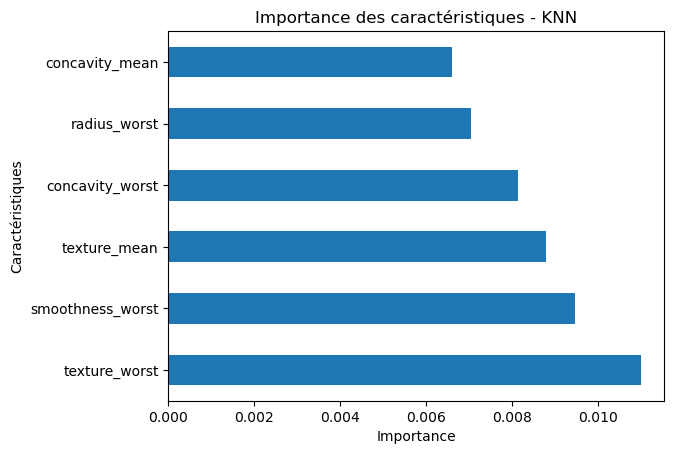

In [ ]:
from sklearn.inspection import permutation_importance # Importation pour l'importance par permutation

# Calcul de l'importance des caractéristiques par permutation pour le modèle KNN
# n_repeats spécifie le nombre de permutations à effectuer pour chaque caractéristique
# random_state est fixé pour assurer la reproductibilité des résultats
knn_importance = permutation_importance(knn, X_train, y_train, n_repeats=10, random_state=42)

# Création d'une série pandas avec les importances moyennes des permutations
# L'index de la série sera les noms des colonnes de DataFrame, en ignorant la première colonne
knn_importance_series = pd.Series(knn_importance.importances_mean, index=df.columns[1:])

# Tri des importances par ordre décroissant pour voir les caractéristiques les plus importantes en premier
knn_importance_series.sort_values(ascending=False).nlargest(6).plot(kind='barh')

# Ajout du titre et des étiquettes au graphique pour une meilleure compréhension
plt.title('Importance des caractéristiques - KNN')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')

# Affichage du graphique
plt.show()

- Pour Arbre de décision :

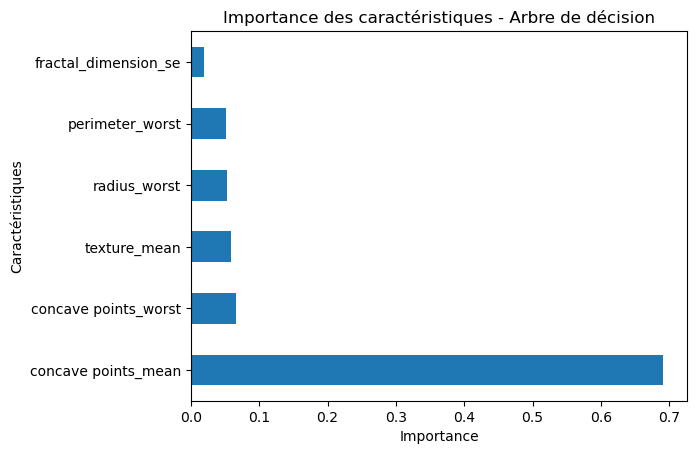

In [ ]:
# Création d'une série pandas avec les importances des caractéristiques de l'arbre de décision
# L'index de la série sera les noms des colonnes de DataFrame, en ignorant la première colonne
tree_importance = pd.Series(decisionTree.feature_importances_, index=df.columns[1:])

# Tri des importances des caractéristiques par ordre décroissant
tree_importance = tree_importance.sort_values(ascending=False)

# Création d'un graphique en barres horizontales des 6 caractéristiques les plus importantes
tree_importance.nlargest(6).plot(kind='barh')

# Ajout du titre et des étiquettes au graphique pour une meilleure compréhension
plt.title('Importance des caractéristiques - Arbre de décision')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')

# Affichage du graphique
plt.show()

- Pour SVC :

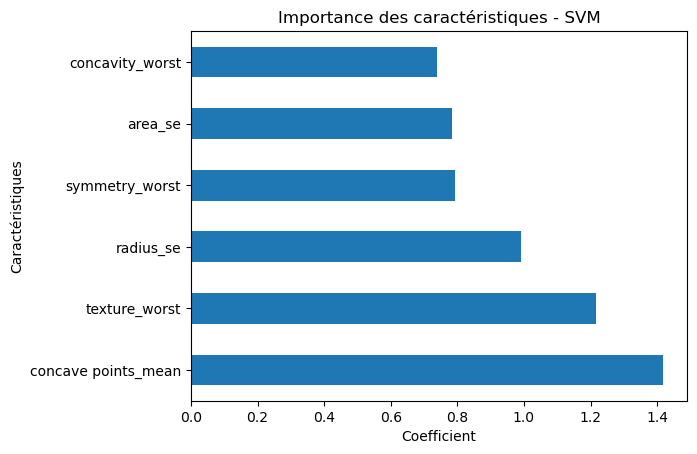

In [ ]:
# Création d'une série pandas avec les coefficients du modèle SVM linéaire
# L'index de la série sera les noms des colonnes de DataFrame, en ignorant la première colonne
coeff = pd.Series(svc.coef_[0], index=df.columns[1:])

# Tri des coefficients par ordre décroissant pour voir les caractéristiques les plus importantes en premier
coeff = coeff.sort_values(ascending=False)

# Sélection et création d'un graphique en barres horizontales des 6 caractéristiques les plus importantes
coeff.nlargest(6).plot(kind='barh')

# Ajout du titre et des étiquettes au graphique pour une meilleure compréhension
plt.title('Importance des caractéristiques - SVM')
plt.xlabel('Coefficient')
plt.ylabel('Caractéristiques')

# Affichage du graphique
plt.show()

**7- Déploiement et Utilisation :**

- Création d'une interface utilisateur simple permettant à un médecin de saisir les mesures cliniques 
d'une biopsie de tumeur mammaire et d'obtenir une prédiction sur son diagnostic.

In [82]:
# Création de la fenêtre principale de l'application
root = tk.Tk()
root.title('Prédiction du diagnostic du cancer du sein')  # Titre de la fenêtre

# Liste pour stocker les champs de saisie d'entrée
entries = []

# Création des champs de saisie d'entrée pour les caractéristiques du cancer
for i, column_name in enumerate(df.columns[1:]):
    tk.Label(root, text=column_name).grid(row=i, column=0, padx=10)  # Étiquette pour le nom de la caractéristique
    entry = tk.Entry(root)  # Champ de saisie pour la valeur de la caractéristique
    entry.grid(row=i, column=1, padx=10)  # Placement du champ de saisie
    entries.append(entry)  # Ajout du champ de saisie à la liste des entrées

# Fonction pour effectuer la prédiction du diagnostic du cancer du sein
def predict_diagnosis():
    try:
        # Récupération des données saisies par l'utilisateur
        input_data = [float(entry.get()) for entry in entries]
    except ValueError:
        # Gestion de l'erreur si des valeurs non numériques sont entrées
        messagebox.showerror('Erreur', 'Veuillez entrer des valeurs numériques valides dans tous les champs.')
        return
    
    try:
        # Transformation des données saisies en un tableau numpy
        input_data = np.array(input_data).reshape(1, -1)

        # Normalisation des données (si un objet 'scaler' est défini)
        input_data = scaler.transform(input_data)
        
        # Prédiction du diagnostic à partir des données saisies
        prediction = logisticRegression.predict(input_data)

        # Détermination du résultat de la prédiction (Maligne ou Bénigne)
        if prediction[0] == 1:
            result = 'Maligne'
        else:
            result = 'Bénigne'

        # Affichage du résultat de la prédiction dans une boîte de dialogue
        messagebox.showinfo('Résultat', f'Prédiction : {result}')
    except Exception as e:
        # Gestion de toute autre exception imprévue
        messagebox.showerror('Erreur', f'Une erreur est survenue : {e}')

# Bouton pour lancer la prédiction du diagnostic
tk.Button(root, text='Prédire le diagnostic', command=predict_diagnosis, bg='Green', fg='white', padx=10, pady=3).grid(row=len(df.columns[1:]), columnspan=2, padx=10, pady=10)  # Placement du bouton

# Boucle principale de l'interface graphique pour maintenir l'application en cours d'exécution
root.mainloop()
